# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [39]:
base_sinasc = pd.read_csv('./SINASC_RO_2019.csv')
base_sinasc.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [43]:
for i in [0.0,1.0,2.0,3.0]:
    base_sinasc['APGAR5'].replace(i,'asfixia grave',inplace=True)
for i in [4.0,5.0]:
    base_sinasc['APGAR5'].replace(i,'asfixia moderada',inplace=True)
for i in [6.0,7.0]:
    base_sinasc['APGAR5'].replace(i,'asfixia leve',inplace=True)
for i in [8.0,9.0,10.0]:
    base_sinasc['APGAR5'].replace(i,'normal',inplace=True)

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [21]:
dist = base_sinasc.groupby(['SEXO','GESTACAO'])['APGAR5'].value_counts()
dist

SEXO       GESTACAO             APGAR5          
Feminino   22 a 27 semanas      normal                 28
                                asfixia grave          11
                                asfixia leve            6
           28 a 31 semanas      normal                 62
                                asfixia moderada        9
                                asfixia leve            7
                                asfixia grave           2
           32 a 36 semanas      normal                994
                                asfixia leve           37
                                asfixia moderada        8
                                asfixia grave           4
           37 a 41 semanas      normal              10876
                                asfixia leve           86
                                asfixia grave          18
                                asfixia moderada       10
           42 semanas e mais    normal                329
                       

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [23]:
tabela_cruzada = pd.crosstab(base_sinasc['GESTACAO'], base_sinasc['APGAR5'])
tabela_cruzada

APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [36]:
tabela_cruzada_pct = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100
tabela_cruzada_pct

APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,24.705882,14.117647,1.176471,60.000000
28 a 31 semanas,1.851852,11.111111,7.407407,79.629630
32 a 36 semanas,0.358102,3.267681,0.850492,95.523724
37 a 41 semanas,0.146517,0.870222,0.124317,98.858944
42 semanas e mais,0.143266,0.859599,0.143266,98.853868
Menos de 22 semanas,28.571429,14.285714,0.000000,57.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

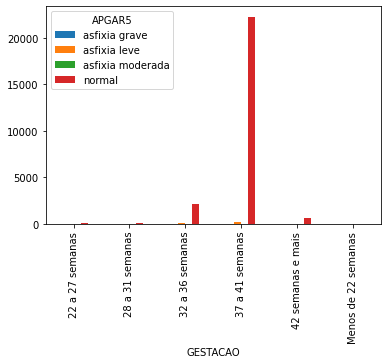

In [41]:
plot = tabela_cruzada.plot.bar()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<AxesSubplot:xlabel='PESO', ylabel='APGAR5'>

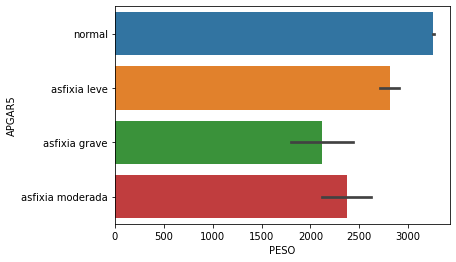

In [48]:
sns.barplot(x=base_sinasc['PESO'], y=base_sinasc['APGAR5'],data=base_sinasc)

In [ ]:
# a partir do barplot plotado acima é possível verificar que quanto menor o peso do bebê maior é a chance de ele ter sofrido algum tipo de asfixia durante o parto